PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING


In [42]:
# 1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng
#đầu tiên
import pandas as pd
import numpy as np
def load_data(file_path='titanic_disaster.csv'):
    try:
        data = pd.read_csv(file_path)
        print("Tải dữ liệu thành công! Hiển thị 10 dòng đầu tiên:")
        print(data.head(10))
        return data
    except Exception as e:
        print(f"Lỗi khi tải file: {e}")
        return None
file_name = 'titanic_disaster.csv' 
df = load_data(file_name)

Tải dữ liệu thành công! Hiển thị 10 dòng đầu tiên:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6            

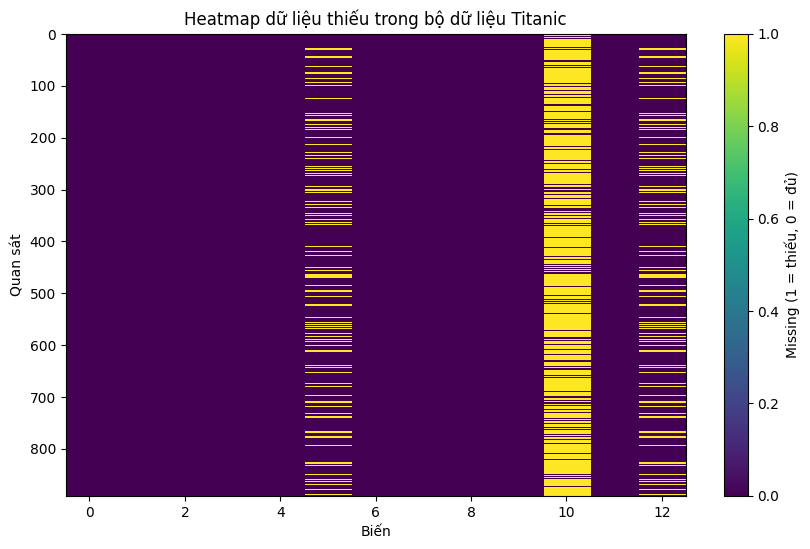

,firstName,secondName
0,Owen Harris,Braund
1,John Bradley (Florence Briggs Thayer),Cumings
2,Laina,Heikkinen
3,Jacques Heath (Lily May Peel),Futrelle
4,William Henry,Allen


In [36]:
# 1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng
#đầu tiên

import pandas as pd
import numpy as np


df = pd.read_csv('titanic_disaster.csv')
df.head(10)

#2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat
#map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

# Thống kê số lượng giá trị thiếu
missing_count = df.isnull().sum()

# Thống kê tỷ lệ thiếu (%)
missing_percent = df.isnull().mean() * 100

missing_table = pd.DataFrame({
    "Số giá trị thiếu": missing_count,
    "Tỷ lệ thiếu (%)": missing_percent
})

missing_table.loc[["Age", "Cabin", "Embarked"]]

#Trực quan hóa dữ liệu thiếu bằng Heatmap

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.imshow(df.isnull(), aspect='auto', interpolation='nearest')
plt.colorbar(label="Missing (1 = thiếu, 0 = đủ)")
plt.xlabel("Biến")
plt.ylabel("Quan sát")
plt.title("Heatmap dữ liệu thiếu trong bộ dữ liệu Titanic")
plt.show()

#3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi
#tách cột xong thì xóa luôn cột Name

# Tách tên
df["secondName"] = df["Name"].str.split(",").str[0].str.strip()
df["firstName"] = (
    df["Name"]
    .str.split(",").str[1]
    .str.split(".").str[1]
    .str.strip()
)

# Xóa cột Name
df.drop(columns=["Name"], inplace=True)

df[["firstName", "secondName"]].head()






In [18]:
#4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F
df = pd.read_csv('titanic_disaster.csv')
df.head(10)
df["Sex"] = df["Sex"].replace({
    "male": "M",
    "female": "F"
})
df["Sex"].value_counts()


Sex
M    577
F    314
Name: count, dtype: int64

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


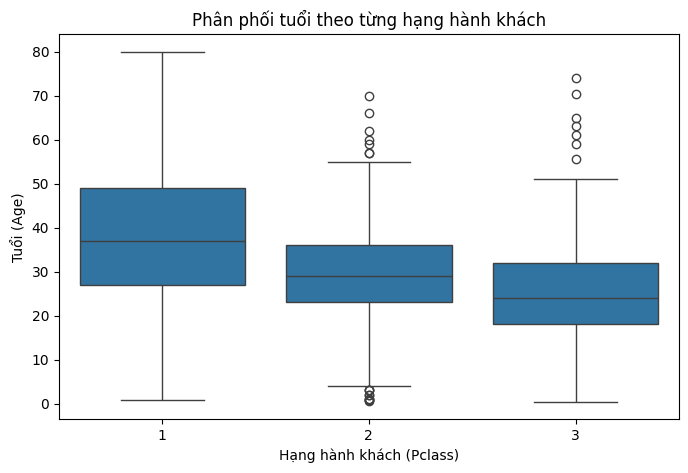

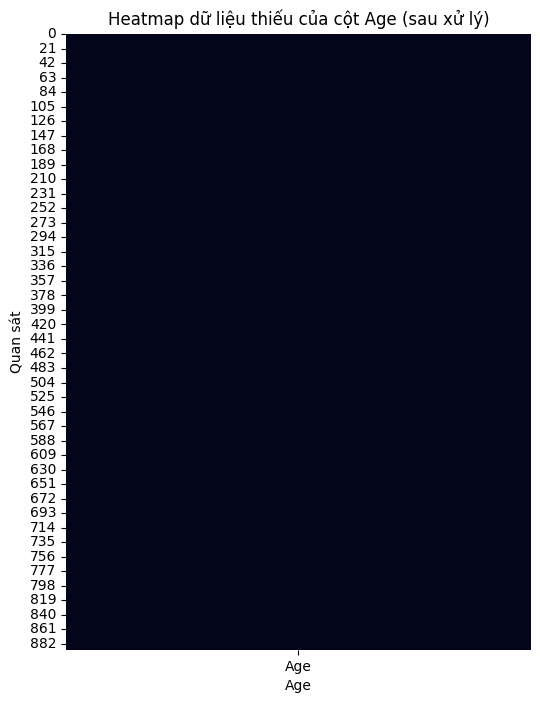

In [21]:
%pip install seaborn
#5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa
#ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng
#vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

#a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
#phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
#hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv("titanic_disaster.csv")

# Vẽ box plot
plt.figure(figsize=(8,5))
sns.boxplot(x="Pclass", y="Age", data=df)
plt.xlabel("Hạng hành khách (Pclass)")
plt.ylabel("Tuổi (Age)")
plt.title("Phân phối tuổi theo từng hạng hành khách")
plt.show()

#b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực
#quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.
# (1) Lưu lại Age trước khi xử lý để đối chiếu
df["Age_before"] = df["Age"]

# (2) Điền Age thiếu bằng trung bình theo từng Pclass
df["Age"] = df["Age"].fillna(df.groupby("Pclass")["Age"].transform("mean"))

# (3) Bảng kiểm tra nhanh: trước/sau + trạng thái thiếu
result_table = df[["Pclass", "Age_before", "Age"]].head(20)
result_table

plt.figure(figsize=(6,8))
sns.heatmap(df[["Age"]].isna(), cbar=False)
plt.title("Heatmap dữ liệu thiếu của cột Age (sau xử lý)")
plt.xlabel("Age")
plt.ylabel("Quan sát")
plt.show()

In [22]:
#6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa
#trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult
#và ( age > 60): Older
import pandas as pd
df = pd.read_csv("titanic_disaster.csv")

# Giả sử df đã được xử lý thiếu Age ở bước trước

bins = [0, 12, 18, 60, float("inf")]
labels = ["Kid", "Teen", "Adult", "Older"]

df["Agegroup"] = pd.cut(
    df["Age"],
    bins=bins,
    labels=labels,
    right=True
)

df[["Age", "Agegroup"]].head(15)



,Age,Agegroup
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,NaN
6,54.0,Adult
7,2.0,Kid
8,27.0,Adult
9,14.0,Teen


In [23]:
#7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi “secondName”
import pandas as pd
df = pd.read_csv("titanic_disaster.csv")

# Tách danh xưng (Title)
df["namePrefix"] = df["Name"].str.extract(r",\s*([^\.]+)\.")

# Giữ lại các danh xưng chính theo yêu cầu
df["namePrefix"] = df["namePrefix"].replace({
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master"
})

# Các danh xưng khác gom vào 'Other'
df["namePrefix"] = df["namePrefix"].where(
    df["namePrefix"].isin(["Mr", "Mrs", "Miss", "Master"]),
    "Other"
)

df[["Name", "namePrefix"]].head(10)

,Name,namePrefix
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


In [26]:
#8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch
#9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách
#dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

import pandas as pd

df = pd.read_csv("titanic_disaster.csv")

df["familySize"] = 1 + df["SibSp"] + df["Parch"]
df["Alone"] = (df["familySize"] == 0).astype(int)

df[["SibSp", "Parch", "familySize"]].head(10)
df[["familySize", "Alone"]].head(10)


,familySize,Alone
0,2,0
1,2,0
2,1,0
3,2,0
4,1,0
5,1,0
6,1,0
7,5,0
8,3,0
9,2,0


In [27]:
#10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính
#cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu
#hì thay thế bằng “Unknown”
import pandas as pd

df = pd.read_csv("titanic_disaster.csv")

# Tạo biến typeCabin
df["typeCabin"] = df["Cabin"].str[0]
df["typeCabin"] = df["typeCabin"].fillna("Unknown")

df[["Cabin", "typeCabin"]].head(10)




,Cabin,typeCabin
0,NaN,Unknown
1,C85,C
2,NaN,Unknown
3,C123,C
4,NaN,Unknown
5,NaN,Unknown
6,E46,E
7,NaN,Unknown
8,NaN,Unknown
9,NaN,Unknown


PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA


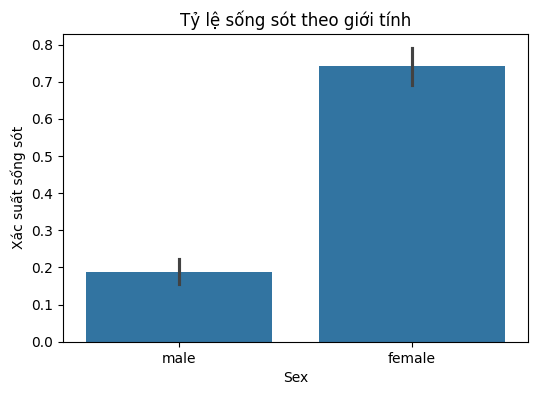

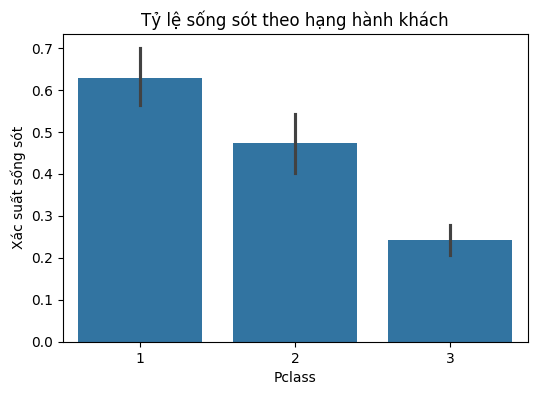

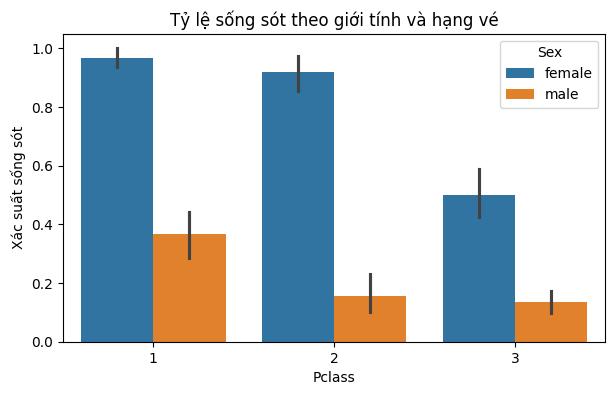

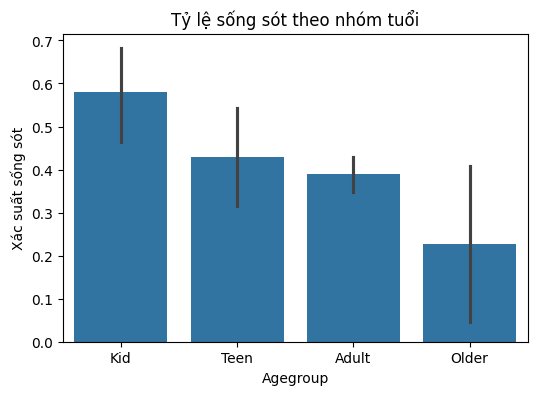

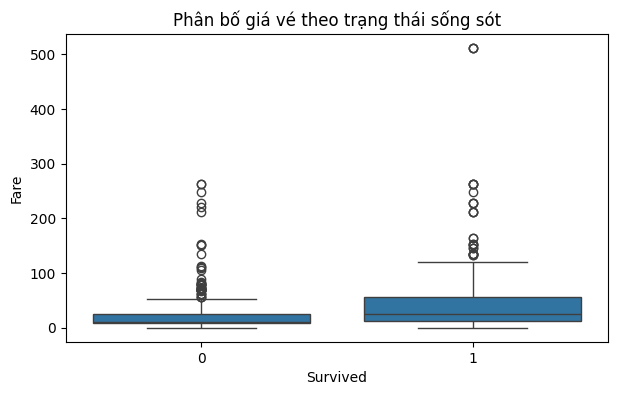

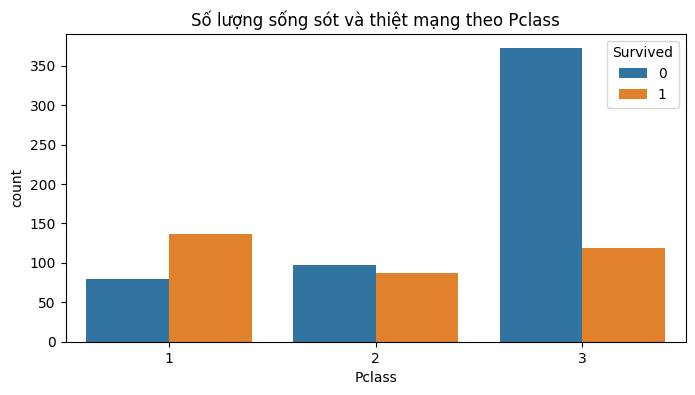

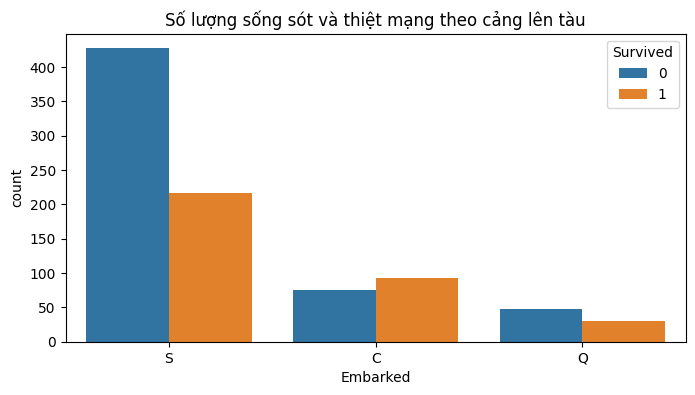

In [35]:
# 12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic_disaster.csv")

plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Tỷ lệ sống sót theo giới tính")
plt.ylabel("Xác suất sống sót")
plt.show()

#13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Tỷ lệ sống sót theo hạng hành khách")
plt.ylabel("Xác suất sống sót")
plt.show()

#14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác
plt.figure(figsize=(7,4))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.title("Tỷ lệ sống sót theo giới tính và hạng vé")
plt.ylabel("Xác suất sống sót")
plt.show()



#15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng
df["Agegroup"] = pd.cut(
    df["Age"],
    bins=bins,
    labels=labels,
    right=True
)
df[["Age", "Agegroup"]].head(15)

plt.figure(figsize=(6,4))
sns.barplot(x="Agegroup", y="Survived", data=df)
plt.title("Tỷ lệ sống sót theo nhóm tuổi")
plt.ylabel("Xác suất sống sót")
plt.show()

#16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé
plt.figure(figsize=(7,4))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Phân bố giá vé theo trạng thái sống sót")
plt.show()

#17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và
#cảng sẽ cập bến.

#theo Pclass
plt.figure(figsize=(8,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Số lượng sống sót và thiệt mạng theo Pclass")
plt.show()

#cảng lên tàu (Embarked)
plt.figure(figsize=(8,4))
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Số lượng sống sót và thiệt mạng theo cảng lên tàu")
plt.show()


